In [32]:
# import Pkg; Pkg.add("Plots")

In [33]:
# using CSV, DataFrames, Statistics, Dates, Gadfly, LinearAlgebra, Plots

In [34]:
trainData = CSV.read("./data/train.csv", DataFrame)
testData = CSV.read("./data/test.csv", DataFrame)

Row,annee,type,nombre_cylindres,cylindree,transmission,boite
,Int64,String31,Int64,String3,String15,String15
1,2014,voiture_moyenne,4,"2,5",traction,manuelle
2,2014,voiture_moyenne,4,"2,5",traction,automatique
3,2014,VUS_petit,4,"2,5",traction,automatique
4,2014,VUS_petit,4,2,4x4,automatique
5,2014,voiture_sous_compacte,8,"5,8",propulsion,manuelle
6,2014,voiture_sous_compacte,8,5,propulsion,automatique
7,2014,voiture_sous_compacte,8,5,propulsion,manuelle
8,2014,VUS_petit,4,"2,4",4x4,automatique
9,2014,VUS_petit,6,"3,5",integrale,automatique


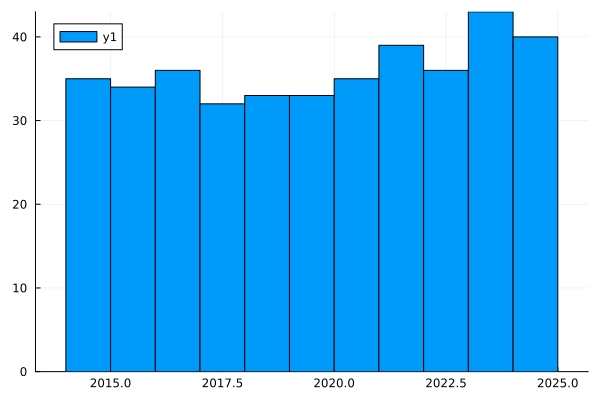

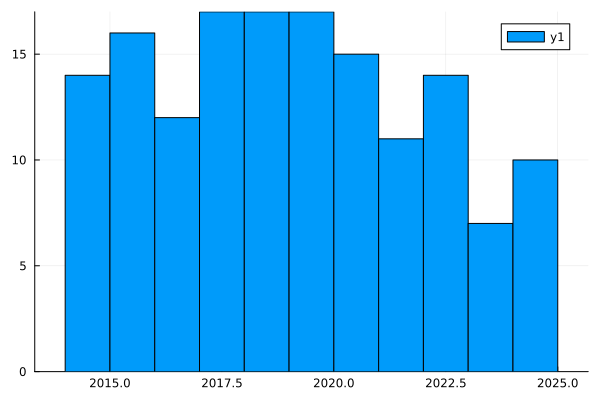

In [35]:

display(histogram(trainData.annee, bins = 11))
display(histogram(testData.annee, bins = 11))


In [36]:
function display_data(data, col)
    grouped = combine(groupby(data, col), nrow => :count)
    println(sort(grouped))
end

display_data (generic function with 1 method)

In [37]:
for col in names(trainData[:, Not(:consommation)])
    display_data(trainData, Symbol(col))
    display_data(testData, Symbol(col))
end
# display_data(trainData, :annee)

11×2 DataFrame
 Row │ annee  count 
     │ Int64  Int64 
─────┼──────────────
   1 │  2014     35
   2 │  2015     34
   3 │  2016     36
   4 │  2017     32
   5 │  2018     33
   6 │  2019     33
   7 │  2020     35
   8 │  2021     39
   9 │  2022     36
  10 │  2023     43
  11 │  2024     40
11×2 DataFrame
 Row │ annee  count 
     │ Int64  Int64 
─────┼──────────────
   1 │  2014     14
   2 │  2015     16
   3 │  2016     12
   4 │  2017     17
   5 │  2018     17
   6 │  2019     17
   7 │  2020     15
   8 │  2021     11
   9 │  2022     14
  10 │  2023      7
  11 │  2024     10
13×2 DataFrame
 Row │ type                   count 
     │ String31               Int64 
─────┼──────────────────────────────
   1 │ VUS_petit                110
   2 │ VUS_standard              22
   3 │ break_moyen                1
   4 │ break_petit                8
   5 │ camionnette_petit          5
   6 │ camionnette_standard       2
   7 │ monospace                  7
   8 │ voiture_compacte   